In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('BTC-USD.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2264,2020-11-28,17112.933594,17853.939453,16910.652344,17717.414063,17717.414063,32601040733
2265,2020-11-29,17719.634766,18283.628906,17559.117188,18177.484375,18177.484375,31133957704
2266,2020-11-30,18178.322266,19749.263672,18178.322266,19625.835938,19625.835938,47728480399
2267,2020-12-01,19633.769531,19845.974609,18321.921875,18802.998047,18802.998047,49633658712
2268,2020-12-02,18979.257813,19282.054688,18356.322266,19218.062500,19218.062500,52552228864


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2264    17717.414063
2265    18177.484375
2266    19625.835938
2267    18802.998047
2268    19218.062500
Name: Close, Length: 2269, dtype: float64

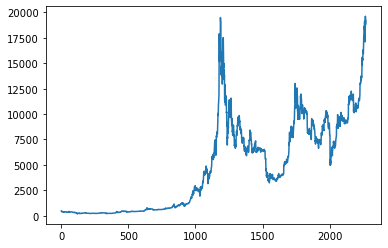

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
df1

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2264    17717.414063
2265    18177.484375
2266    19625.835938
2267    18802.998047
2268    19218.062500
Name: Close, Length: 2269, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.01435802]
 [0.01266662]
 [0.01114233]
 ...
 [1.        ]
 [0.95768978]
 [0.97903234]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1474, 795)

In [14]:
train_data

array([[0.01435802],
       [0.01266662],
       [0.01114233],
       ...,
       [0.33415962],
       [0.3324823 ],
       [0.33031392]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1373, 100)
(1373,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(694, 100)
(694,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
pip install tensorflow


  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached wrapt-1.12.1-cp38-cp38-win_amd64.whl


In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 6s 280ms/step - loss: 0.0093 - val_loss: 0.0039
Epoch 2/100
22/22 [==============================] - 4s 176ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 3/100
22/22 [==============================] - 4s 183ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 4/100
22/22 [==============================] - 4s 173ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 5/100
22/22 [==============================] - 4s 189ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/100
22/22 [==============================] - 4s 189ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/100
22/22 [==============================] - 5s 206ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 8/100
22/22 [==============================] - 4s 205ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/100
22/22 [==============================] - 5s 212ms/step - loss: 9.8817e-04 - val_loss: 0.0013
Epoch 10/100
22/22 [==============================] - 5s 214ms/step - loss: 9.0358e-04 

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.3.1'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4990.872732876347

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

9476.80207632384

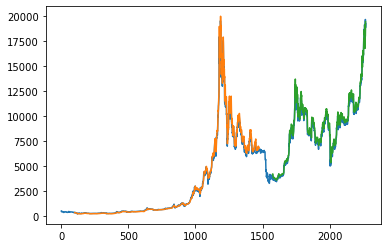

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

795

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 454)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.5232075002196526,
 0.5316378992536887,
 0.5277310934460142,
 0.5222650703202085,
 0.5110041678970627,
 0.5142125873148579,
 0.5261293944667811,
 0.5235799930455246,
 0.5234515437806372,
 0.5229200711904202,
 0.5192734278405166,
 0.5174469175676861,
 0.5152346075709102,
 0.5187397457896838,
 0.5143807062421343,
 0.5060545529834874,
 0.508660295316218,
 0.49112260287490755,
 0.43411041454613325,
 0.4272420951175792,
 0.40831827545610483,
 0.41515084202842056,
 0.4148458880259158,
 0.407558175240576,
 0.41731163172701863,
 0.4198521953572317,
 0.42241113758206467,
 0.4155697332701254,
 0.41279034838428896,
 0.40999110360006874,
 0.4015919381808628,
 0.4148308738337277,
 0.41396497115750897,
 0.4328338558811559,
 0.4323573684145646,
 0.4187456637596781,
 0.41950661764797426,
 0.418707048616089,
 0.42146730165755425,
 0.41276102301244577,
 0.4046447923711234,
 0.40754406490695344,
 0.4008233014433392,
 0.40161275217503006,
 0.413620196883801,
 0.41473305554273354,
 0.4062221623449432,
 0

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=453
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.5316379  0.52773109 0.52226507 0.51100417 0.51421259 0.52612939
 0.52357999 0.52345154 0.52292007 0.51927343 0.51744692 0.51523461
 0.51873975 0.51438071 0.50605455 0.5086603  0.4911226  0.43411041
 0.4272421  0.40831828 0.41515084 0.41484589 0.40755818 0.41731163
 0.4198522  0.42241114 0.41556973 0.41279035 0.4099911  0.40159194
 0.41483087 0.41396497 0.43283386 0.43235737 0.41874566 0.41950662
 0.41870705 0.4214673  0.41276102 0.40464479 0.40754406 0.4008233
 0.40161275 0.4136202  0.41473306 0.40622216 0.37724546 0.37615622
 0.43617409 0.46621731 0.48198995 0.46679196 0.47561248 0.46419928
 0.46388348 0.4670468  0.47031779 0.46572274 0.47483732 0.47123356
 0.47217724 0.46737882 0.44358784 0.44403525 0.456476   0.44116634
 0.44414221 0.44376173 0.43861111 0.42749914 0.43052102 0.4319204
 0.41810442 0.41280094 0.40360309 0.38383122 0.36603108 0.37123576
 0.35324498 0.35829527 0.36200971 0.37811917 0.37459394 0.38992415
 0.38007139 0.37259816 0.36733769 0.36724293 0.36374

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

2269

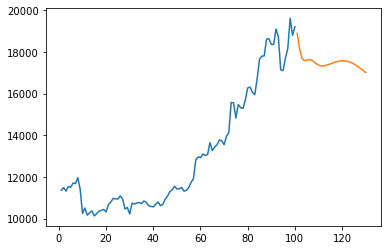

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[2169:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

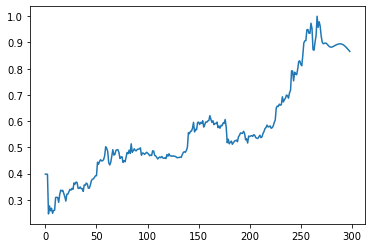

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

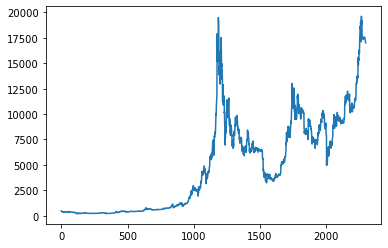

In [44]:
plt.plot(df3)